In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# ignoring all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
data = pd.read_csv("zomato.csv",encoding = 'latin-1')
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [5]:
zero_rated_countries = pd.crosstab(data['Country Code'], data["Aggregate rating"])[0]
zero_rated_countries = zero_rated_countries[zero_rated_countries != 0].index
zero_rated_countries

Index([1, 30, 215, 216], dtype='int64', name='Country Code')

In [7]:
cuisines = data.Cuisines.value_counts()
cuisines[:10]

Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1cd85ed4cd0>,
 [Text(0.7383739591473525, 0.8153550738500767, 'North Indian'),
  Text(-0.5794679892179088, 0.9349956414185864, 'North Indian, Chinese'),
  Text(-1.0673095097169618, 0.2661774041269067, 'Chinese'),
  Text(-1.0185983597190356, -0.41527988342525135, 'Fast Food'),
  Text(-0.5935790624456829, -0.9261014505042654, 'North Indian, Mughlai'),
  Text(-0.0058866565538183155, -1.0999842486484148, 'Cafe'),
  Text(0.4842059922264186, -0.9876965916170967, 'Bakery'),
  Text(0.8087362934536483, -0.7456176014894329, 'North Indian, Mughlai, Chinese'),
  Text(1.0055375847517363, -0.445975521359239, 'Bakery, Desserts'),
  Text(1.0902990515030275, -0.14576686280358406, 'Street Food')],
 [Text(0.40274943226219223, 0.4447391311909509, '26.58%'),
  Text(-0.3160734486643138, 0.5099976225919561, '14.51%'),
  Text(-0.5821688234819792, 0.14518767497831275, '10.05%'),
  Text(-0.5555991053012921, -0.22651630005013706, '10.05%'),
  Text(-0.3237703976976452, -0.505146245

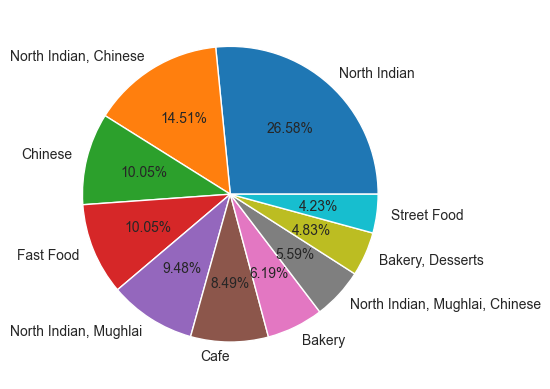

In [12]:
plt.pie(x = cuisines.values[:10], labels = cuisines.index[:10], autopct='%1.2f%%')